##### Part 1

In [1]:
environment = [
    ['G', 'WALL', 'G', 'WHITE', 'WHITE', 'G'],
    ['WHITE', 'B', 'WHITE', 'G', 'WALL', 'B'],
    ['WHITE', 'WHITE', 'B', 'WHITE', 'G', 'WHITE'],
    ['WHITE', 'WHITE', 'WHITE', 'B', 'WHITE', 'G'],
    ['WHITE', 'WALL', 'WALL', 'WALL', 'B', 'WHITE'],
    ['WHITE', 'WHITE', 'WHITE', 'WHITE', 'WHITE', 'WHITE']]

green_reward = 1
brown_reward = -1
white_reward = -0.04

start_x = 2
start_y = 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt

rewards = {'G': 1, 'B': -1, 'WHITE': -0.04}
actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
transition_probabilities = {'intended': 0.8, 'side': 0.1}

# Utilities initialization
utilities = np.zeros((len(environment), len(environment[0])))

# Discount factor
gamma = 0.99

In [3]:
environment[start_y][start_x]

'WHITE'

##### Value Iteration

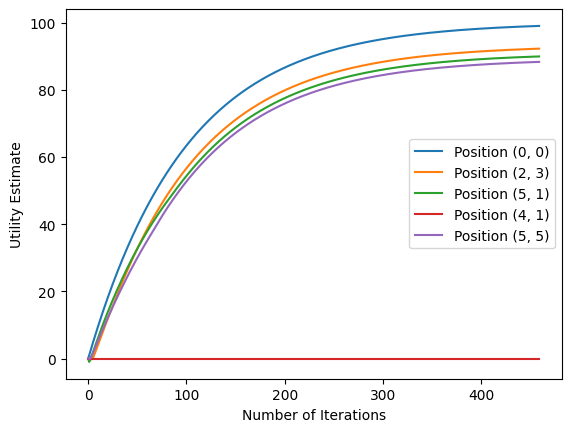

In [4]:
def value_iteration(environment, rewards, actions, transition_probabilities, gamma, threshold=0.001):
    # Initialize utilities and policy
    utilities = np.zeros((len(environment), len(environment[0])))
    policy = {(y, x): None for y in range(len(environment)) for x in range(len(environment[0]))}
    # Track utility estimates for specific positions
    utility_estimates = {pos: [] for pos in [(0, 0), (2, 3), (5, 1), (4, 1), (5, 5)]}

    while True:
        delta = 0
        new_utilities = utilities.copy()
        
        # Update utility estimates for specific positions
        for pos in utility_estimates:
            utility_estimates[pos].append(utilities[pos[1]][pos[0]])

        for y in range(len(environment)):
            for x in range(len(environment[0])):
                if environment[y][x] in rewards:
                    # Calculate the expected utility for each action
                    action_utilities = []
                    for action in actions:
                        expected_utility = 0
                        # Intended action
                        new_x, new_y = move(x, y, action, environment)
                        expected_utility += transition_probabilities['intended'] * utilities[new_y][new_x]
                        # Side actions
                        sides = side_actions(action)
                        for side_action in sides:
                            new_x, new_y = move(x, y, side_action, environment)
                            expected_utility += transition_probabilities['side'] * utilities[new_y][new_x]
                        action_utilities.append(expected_utility)
                    # Update utility and policy
                    best_action_index = np.argmax(action_utilities)
                    new_utilities[y][x] = rewards[environment[y][x]] + gamma * action_utilities[best_action_index]
                    policy[(y, x)] = actions[best_action_index]
                    delta = max(delta, abs(new_utilities[y][x] - utilities[y][x]))

        utilities = new_utilities

        if delta < threshold:
            break

    return utilities, policy, utility_estimates

def move(x, y, action, environment):
    new_x, new_y = x, y
    if action == 'UP':
        new_y = max(y - 1, 0)
    elif action == 'DOWN':
        new_y = min(y + 1, len(environment) - 1)
    elif action == 'LEFT':
        new_x = max(x - 1, 0)
    elif action == 'RIGHT':
        new_x = min(x + 1, len(environment[0]) - 1)

    # Check if the new position is a wall
    if environment[new_y][new_x] == 'WALL':
        return x, y  # Stay in the same place
    return new_x, new_y


def side_actions(action):
    if action == 'UP':
        return ['LEFT', 'RIGHT']
    elif action == 'DOWN':
        return ['LEFT', 'RIGHT']
    elif action == 'LEFT':
        return ["UP", "DOWN"]
    elif action == 'RIGHT':
        return ["UP", "DOWN"]
    
utilities, policy, utility_estimates = value_iteration(environment, rewards, actions, transition_probabilities, gamma, threshold=0.01)

# Plot utility estimates
for pos in utility_estimates:
    plt.plot(utility_estimates[pos], label=f'Position {pos}')
plt.xlabel('Number of Iterations')
plt.ylabel('Utility Estimate')
plt.legend()
plt.show()


In [5]:
utilities

array([[99.01782355,  0.        , 94.06328079, 92.89282455, 91.672438  ,
        92.34632659],
       [97.41118506, 94.90084094, 93.56282192, 93.41553839,  0.        ,
        89.93574675],
       [95.96632374, 94.60425131, 92.31225117, 92.19409658, 92.12019263,
        90.81269463],
       [94.57166266, 93.47031736, 92.25036898, 90.13308008, 90.83223063,
        90.90590812],
       [93.33034297,  0.        ,  0.        ,  0.        , 88.56623665,
        89.58458923],
       [91.95529787, 90.74660118, 89.55297553, 88.37423298, 87.58692263,
        88.31551414]])

In [22]:
environment_shape = (6, 6)
policy_matrix = [['' for _ in range(environment_shape[1])] for _ in range(environment_shape[0])]

for (x, y), action in policy.items():
    policy_matrix[x][y] = action if action is not None else 'None'

for row in policy_matrix:
    print(row)
    

['UP', 'None', 'LEFT', 'LEFT', 'LEFT', 'UP']
['UP', 'LEFT', 'LEFT', 'LEFT', 'None', 'UP']
['UP', 'LEFT', 'LEFT', 'UP', 'LEFT', 'LEFT']
['UP', 'LEFT', 'LEFT', 'UP', 'UP', 'UP']
['UP', 'None', 'None', 'None', 'UP', 'UP']
['UP', 'LEFT', 'LEFT', 'LEFT', 'UP', 'UP']


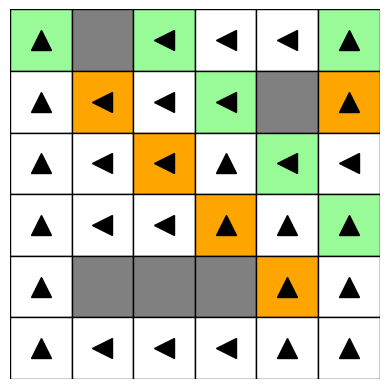

In [25]:
policy = policy_matrix

grid_size = (6, 6)

# Define the colors with the updated brighter green
color_dict = {'G': '#98FB98', 'B': '#FFA500', 'WALL': 'gray', 'WHITE': 'white'}

# Define arrow properties with only triangles
arrow_properties = {'UP': (0, 0.3, '^'), 'DOWN': (0, -0.3, 'v'), 'LEFT': (-0.3, 0, '<'), 'RIGHT': (0.3, 0, '>'), 'None': (0, 0, 'o')}

# Create figure and axes
fig, ax = plt.subplots()

# Remove the axes
ax.axis('off')

# Plot each cell with a black border and only triangles for direction
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        # Draw the rectangle with the updated color and a black border
        rect = plt.Rectangle((j, grid_size[0]-1-i), 1, 1, edgecolor='black', facecolor=color_dict[environment[i][j]])
        ax.add_patch(rect)
        
        # Add the triangle if the policy is not 'None'
        if policy[i][j] != 'None':
            dx, dy, shape = arrow_properties[policy[i][j]]
            if shape != 'o':  # If the shape is not a circle (which we use for 'None')
                ax.plot(j+0.5, grid_size[0]-0.5-i, shape, markersize=15, color='black')

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

# Set the limits of the plot to the limits of the grid
ax.set_xlim(0, grid_size[1])
ax.set_ylim(0, grid_size[0])

# Show the plot with the brighter green
plt.show()

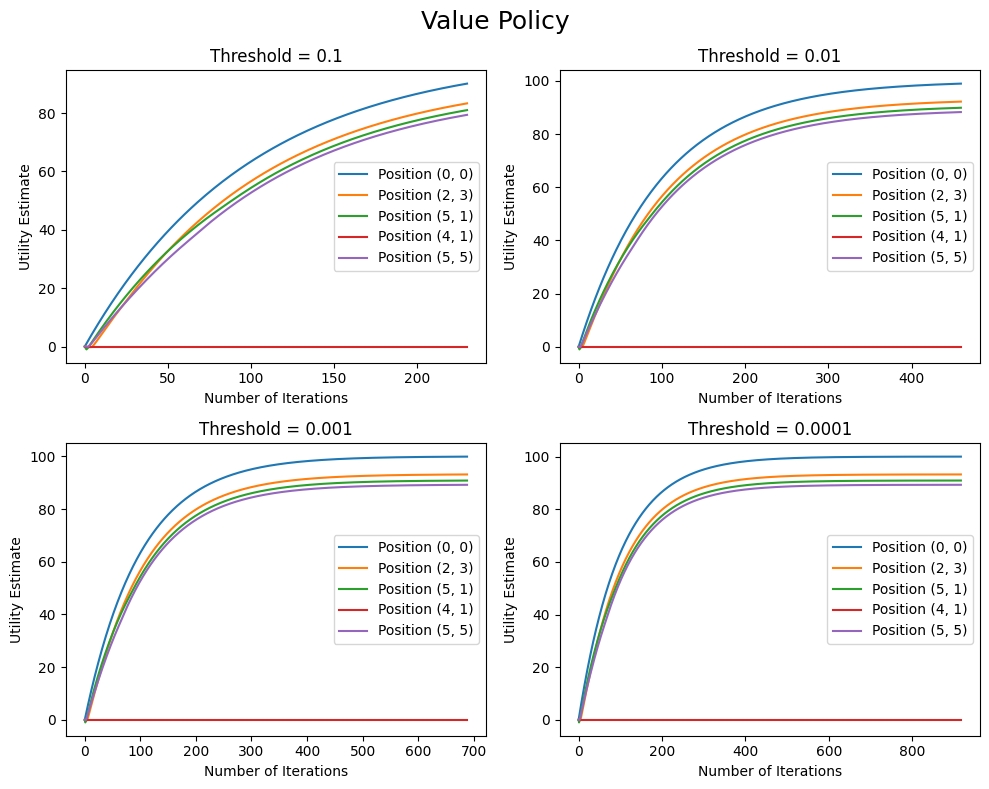

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

thresholds = [0.1, 0.01, 0.001, 0.0001]

for i, threshold in enumerate(thresholds):
    utilities, policy, utility_estimates = value_iteration(environment, rewards, actions, transition_probabilities, gamma, threshold)
    
    ax = axs[i // 2, i % 2] 
    for pos in utility_estimates:
        ax.plot(utility_estimates[pos], label=f'Position {pos}')
    ax.set_xlabel('Number of Iterations')
    ax.set_ylabel('Utility Estimate')
    ax.set_title(f'Threshold = {threshold}')
    ax.legend()

fig.suptitle("Value Policy", fontsize=18)
plt.tight_layout()
plt.show()

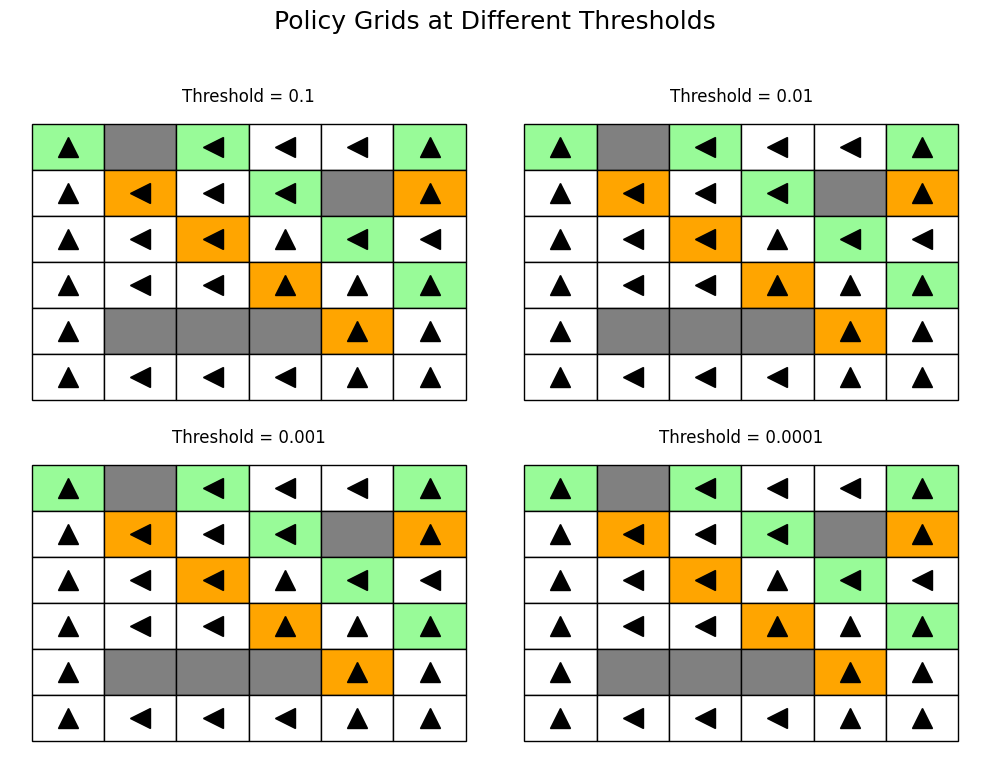

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Define the thresholds
thresholds = [0.1, 0.01, 0.001, 0.0001]

# Define the arrow properties with only triangles
arrow_properties = {'UP': (0, 0.3, '^'), 'DOWN': (0, -0.3, 'v'), 'LEFT': (-0.3, 0, '<'), 'RIGHT': (0.3, 0, '>'), 'None': (0, 0, 'o')}

# Define the colors
color_dict = {'G': '#98FB98', 'B': '#FFA500', 'WALL': 'gray', 'WHITE': 'white'}

# Iterate over the thresholds
for i, threshold in enumerate(thresholds):
    utilities, policy, utility_estimates = value_iteration(environment, rewards, actions, transition_probabilities, gamma, threshold)
    policy_matrix = [['' for _ in range(environment_shape[1])] for _ in range(environment_shape[0])]

    for (x, y), action in policy.items():
        policy_matrix[x][y] = action if action is not None else 'None'
    
    policy = policy_matrix
    
    ax = axs[i // 2, i % 2]  # Select the subplot

    # Plot each cell according to the policy and environment
    for y in range(len(policy)):
        for x in range(len(policy[y])):
            # Draw the rectangle with the respective color and a black border
            rect = plt.Rectangle((x, len(policy)-1-y), 1, 1, edgecolor='black', facecolor=color_dict[environment[y][x]])
            ax.add_patch(rect)
            
            # Add the triangle if the policy is not 'None'
            if policy[y][x] != 'None':
                dx, dy, shape = arrow_properties[policy[y][x]]
                if shape != 'o':  # If the shape is not a circle (which we use for 'None')
                    ax.plot(x+0.5, len(policy)-0.5-y, shape, markersize=15, color='black')

    # Set the title for each subplot
    ax.set_title(f'Threshold = {threshold}')
    ax.axis('off')  # Turn off the axis

# Set the main title of the figure
fig.suptitle("Policy Grids at Different Thresholds", fontsize=18)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

##### Policy Iteration

In [8]:
def policy_evaluation(policy, utilities, environment, rewards, actions, transition_probabilities, gamma, threshold=0.1):
    # Continue iterating until the change in utility values is below the threshold
    while True:
        delta = 0 
        new_utilities = np.copy(utilities)
        for y in range(len(environment)):
            for x in range(len(environment[0])):
                # Update utility values for non-wall states
                if environment[y][x] in rewards:
                    action = policy[y][x]
                    total = 0
                    # Calculate utility value for the intended action
                    new_x, new_y = move(x, y, action, environment)
                    total += transition_probabilities['intended'] * utilities[new_y][new_x]
                    # Calculate utility values for unintended side actions
                    for side_action in side_actions(action):
                        new_x, new_y = move(x, y, side_action, environment)
                        total += transition_probabilities['side'] * utilities[new_y][new_x]
                    # Update utility value for the current state
                    new_utilities[y][x] = rewards[environment[y][x]] + gamma * total
                    # Track the maximum change in utility values
                    delta = max(delta, abs(new_utilities[y][x] - utilities[y][x]))

        utilities = new_utilities

        # Break the loop if the change in utility values is below the threshold
        if delta < threshold:
            break

    return utilities

def policy_iteration(environment, rewards, actions, transition_probabilities, gamma, threshold=0.01):
    # Initialize policy randomly
    policy = np.random.choice(actions, size=(len(environment), len(environment[0])))
    for i in range(len(environment)):
        for j in range(len(environment[0])):
            # Set policy for wall states to None
            if environment[i][j] == 'WALL':
                policy[i][j] = None
    utilities = np.zeros((len(environment), len(environment[0])))
    
    utility_estimates = {pos: [] for pos in [(0, 0), (2, 3), (5, 1), (4, 1), (5, 5)]}
    
    while True:
        # Record utility estimates for specific positions
        for pos in utility_estimates:
            utility_estimates[pos].append(utilities[pos[1]][pos[0]])
        
        # Evaluate the current policy
        utilities = policy_evaluation(policy, utilities, environment, rewards, actions, transition_probabilities, gamma, threshold)
        policy_unchanged = True
        for y in range(len(environment)):
            for x in range(len(environment[0])):
                # Update policy for non-wall states
                if environment[y][x] in rewards:
                    old_action = policy[y][x]
                    best_value = -np.inf
                    # Find the best action by comparing utility values
                    for action in actions:
                        total = 0
                        new_x, new_y = move(x, y, action, environment)
                        total += transition_probabilities['intended'] * utilities[new_y][new_x]
                        for side_action in side_actions(action):
                            new_x, new_y = move(x, y, side_action, environment)
                            total += transition_probabilities['side'] * utilities[new_y][new_x]
                        if total > best_value:
                            best_value = total
                            policy[y][x] = action
                    # Check if the policy has changed
                    if old_action != policy[y][x]:
                        policy_unchanged = False
        
        # Break the loop if the policy has not changed
        if policy_unchanged:
            break
            
    return policy, utilities, utility_estimates

Optimal Policy:
[['UP' 'None' 'LEFT' 'LEFT' 'LEFT' 'UP']
 ['UP' 'LEFT' 'LEFT' 'LEFT' 'None' 'UP']
 ['UP' 'LEFT' 'LEFT' 'UP' 'LEFT' 'LEFT']
 ['UP' 'LEFT' 'LEFT' 'UP' 'UP' 'UP']
 ['UP' 'None' 'None' 'None' 'UP' 'UP']
 ['UP' 'LEFT' 'LEFT' 'LEFT' 'UP' 'UP']]

Utilities:
[[99.01782355  0.         94.06328079 92.89282455 91.672438   92.34632659]
 [97.41118506 94.90084094 93.56282192 93.41553839  0.         89.93574675]
 [95.96632374 94.60425131 92.31225117 92.19409658 92.12019263 90.81269463]
 [94.57166266 93.47031736 92.25036898 90.13308008 90.83223063 90.90590812]
 [93.33034297  0.          0.          0.         88.56623665 89.58458923]
 [91.95529787 90.74660118 89.55297553 88.37423298 87.58692263 88.31551414]]


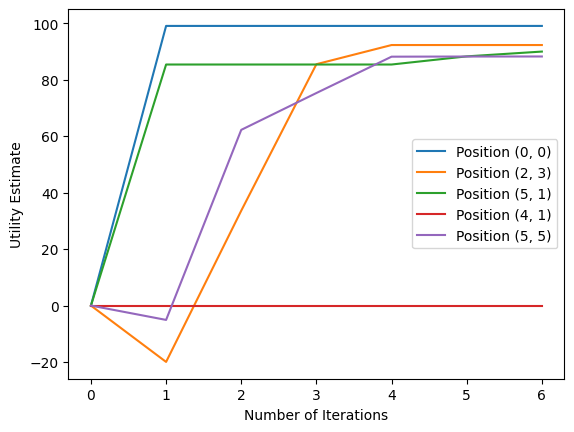

In [9]:
optimal_policy, utilities, utility_estimates = policy_iteration(environment, rewards, actions, transition_probabilities, gamma)

print("Optimal Policy:")
print(optimal_policy)
print("\nUtilities:")
print(utilities)

# Plot utility estimates
for pos in utility_estimates:
    plt.plot(utility_estimates[pos], label=f'Position {pos}')
plt.xlabel('Number of Iterations')
plt.ylabel('Utility Estimate')
plt.legend()
plt.show()


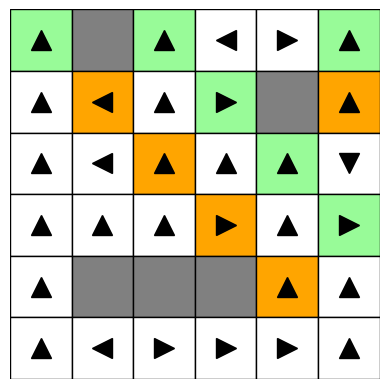

In [35]:
policy = optimal_policy

grid_size = (6, 6)

# Define the colors with the updated brighter green
color_dict = {'G': '#98FB98', 'B': '#FFA500', 'WALL': 'gray', 'WHITE': 'white'}

# Define arrow properties with only triangles
arrow_properties = {'UP': (0, 0.3, '^'), 'DOWN': (0, -0.3, 'v'), 'LEFT': (-0.3, 0, '<'), 'RIGHT': (0.3, 0, '>'), 'None': (0, 0, 'o')}

# Create figure and axes
fig, ax = plt.subplots()

# Remove the axes
ax.axis('off')

# Plot each cell with a black border and only triangles for direction
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        # Draw the rectangle with the updated color and a black border
        rect = plt.Rectangle((j, grid_size[0]-1-i), 1, 1, edgecolor='black', facecolor=color_dict[environment[i][j]])
        ax.add_patch(rect)
        
        # Add the triangle if the policy is not 'None'
        if policy[i][j] != 'None':
            dx, dy, shape = arrow_properties[policy[i][j]]
            if shape != 'o':  # If the shape is not a circle (which we use for 'None')
                ax.plot(j+0.5, grid_size[0]-0.5-i, shape, markersize=15, color='black')

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

# Set the limits of the plot to the limits of the grid
ax.set_xlim(0, grid_size[1])
ax.set_ylim(0, grid_size[0])

# Show the plot with the brighter green
plt.show()

##### Part 2

In [11]:
environment = [
    ['G', 'WALL', 'G', 'WHITE', 'WHITE', 'G', 'WHITE', 'WALL', 'WHITE'],
    ['WHITE', 'B', 'WHITE', 'G', 'WALL', 'B', 'WHITE', 'WHITE', 'WHITE'],
    ['WHITE', 'WHITE', 'B', 'WHITE', 'G', 'WHITE', 'WALL', 'WALL', 'WHITE'],
    ['WHITE', 'WHITE', 'WHITE', 'B', 'WHITE', 'G', 'WHITE', 'WHITE', 'WHITE'],
    ['WHITE', 'WALL', 'WALL', 'WALL', 'B', 'WHITE', 'WHITE', 'WHITE', 'G'],
    ['WHITE', 'WHITE', 'WHITE', 'WHITE', 'WHITE', 'WHITE', 'WALL', 'B', 'WHITE'],
    ['WHITE', 'WALL', 'B', 'WHITE', 'WALL', 'WHITE', 'WHITE', 'WHITE', 'WHITE'],
    ['G', 'WHITE', 'WHITE', 'WHITE', 'WHITE', 'WALL', 'WHITE', 'WHITE', 'B'],
    ['WHITE', 'B', 'WALL', 'WHITE', 'G', 'WHITE', 'WHITE', 'G', 'WHITE']
]


<b>Number of Iterations</b>: As the number of states increases, the number of iterations required for policy evaluation and policy iteration to converge may also increase. This is because there are more state utility values to update and stabilize.

<b>Computational Complexity</b>: With more states and a more complex environment, the computational complexity of each iteration increases. This can lead to longer computation times for each iteration of policy evaluation and policy iteration.

<b>Learning the Right Policy</b>: Despite the increased complexity, the algorithms should still be able to learn the right policy as long as they are given enough time to converge. However, the time required to find the optimal policy may increase with the complexity of the environment.

In [ ]:
def policy_update(self, cur_utilities, cur_policy):
        """
        Updates the optimal policy by comparing expected utilities over all actions
        and the resulting utility from selected action of current policy 
        """
        policy_stable = True
        
        new_policy = [""] * len(self.grid)
        
        actions = list(zip([(0, -1), (-1, 0), (1, 0)], ["up", "left", "right"]))
        unintended_actions = {
            "up": [(-1, 0), (1, 0)],
            "left": [(0, -1), (0, 1)],
            "right": [(0, -1), (0, 1)],
        }
        
        for state_idx, state_pos in enumerate(self.grid): 
            if state_pos in self.walls:
                new_policy[state_idx] = 'wall'
                continue

            cur_col, cur_row = state_pos[0], state_pos[1]
            
            action_expected_utilities = []
            # Iterate over actions available
            for action in actions: 
                expected_utility = 0

                # chosen action has 0.8 probability
                next_state_col = cur_col + action[0][0]
                next_state_row = cur_row + action[0][1]

                if not self.move_or_stay(next_state_col, next_state_row):
                    # stays put if at corner / hits wall
                    next_state_idx = state_idx
                    next_state_col, next_state_row = cur_col, cur_row
                else:
                    next_state_idx = self.grid.index((next_state_col, next_state_row))

                next_state_utility = cur_utilities[next_state_idx]
                expected_utility += 0.8 * next_state_utility

                direction = action[1]
                for other_action in unintended_actions.get(direction):
                    # other actions have 0.1 probability
                    next_state_col = cur_col + other_action[0]
                    next_state_row = cur_row + other_action[1]
                    if not self.move_or_stay(next_state_col, next_state_row):
                        # stays put if at corner / hits wall
                        next_state_idx = state_idx
                        next_state_col, next_state_row = cur_col, cur_row
                    else:
                        next_state_idx = self.grid.index((next_state_col, next_state_row))

                    next_state_utility = cur_utilities[next_state_idx]
                    expected_utility += 0.1 * next_state_utility

                action_expected_utilities.append(expected_utility)
             
            # Find action with greatest expected utility 
            optimal_action_idx = np.argmax(action_expected_utilities)
            optimal_action = actions[optimal_action_idx][1]
            
            if optimal_action != cur_policy[state_idx]
                new_policy[state_idx] = optimal_action
                policy_stable = False
        
            else:
                # Keep the current policy action 
                new_policy[state_idx] = cur_policy[state_idx]

        return new_policy, policy_stable

In [ ]:
def iterative_policy_evaluation(self, policy, max_delta=None):
        
        # initialise 0 for all states
        utilities = [0] * len(self.grid)
        actions = list(zip([(0, -1), (-1, 0), (1, 0)], ["up", "left", "right"]))
        unintended_actions = {
            "up": [(-1, 0), (1, 0)],
            "left": [(0, -1), (0, 1)],
            "right": [(0, -1), (0, 1)],
        }
        
        flag = True
        num_iter = 0 
        
        while flag: 
            delta = 0 
            num_iter +=1 
            
            for state_idx, state_pos in enumerate(self.grid):
                
                if state_pos in self.walls:
                    utilities[state_idx] = -999
                    continue
                
                cur_state_utility = utilities[state_idx]
                reward = self.rewards[state_idx]
                cur_col, cur_row = state_pos[0], state_pos[1]
                expected_utility = 0
                
                # Get selected action from the policy
                policy_action = policy[state_idx]
                for a in actions:
                    if policy_action == a[1]:  
                        action = a
                
                # Apply selected policy action
                next_state_col = cur_col + action[0][0]
                next_state_row = cur_row + action[0][1]

                if not self.move_or_stay(next_state_col, next_state_row):
                    # stays put if at corner / hits wall
                    next_state_idx = state_idx
                    next_state_col, next_state_row = cur_col, cur_row

                else:
                    next_state_idx = self.grid.index((next_state_col, next_state_row))
                
                # chosen action has 0.8 probability
                # alter the current array of utilities 
                expected_utility += 0.8 * utilities[next_state_idx]

                direction = action[1]
                for other_action in unintended_actions.get(direction):
                    # other actions have 0.1 probability
                    next_state_col = cur_col + other_action[0]
                    next_state_row = cur_row + other_action[1]
                    
                    if not self.move_or_stay(next_state_col, next_state_row):
                        # stays put if at corner / hits wall
                        next_state_idx = state_idx
                        next_state_col, next_state_row = cur_col, cur_row
                    else:
                        next_state_idx = self.grid.index((next_state_col, next_state_row))

                    expected_utility += 0.1 * utilities[next_state_idx]
                
                utilities[state_idx] = reward + (self.discount * expected_utility)
                diff = abs(cur_state_utility-utilities[state_idx])
                
                if diff > delta:
                    delta = diff 
            
            if max_delta is None:
                flag = False # only 1 iteration
            
            if delta < max_delta:
                flag = False
    
        return utilities